# TAU Vehicle type Recognition
1. GPU 
2. tf.dataset with TFRecord Data Pipeline
3. Keras Model
4. Transfer Learning with Xception Model
5. Model Evaluation
6. Tensorflow Lite Inference
7. Dataset: https://www.kaggle.com/c/vehicle
There are total 17 classes, I worked on 5 classes Bus, Car, Motorcycle,Bicycle, Car.

# Check GPU/ Keras and Tensorflow 

In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

GPU Available:  True
Tensorflow Version:  2.4.1
Keras Version:  2.4.0


In [ ]:
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
! nvidia-smi

Sun Apr  4 23:11:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    32W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/Kaggle

kaggle.json  testset  test_tfrecords  test.zip	train  train_tfrecords


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

# Loading Data from Kaggle
Dataset: https://www.kaggle.com/c/vehicle

In [ ]:
!pip install wget
import wget
import zipfile as zf

Getting Train and Test Folders

In [ ]:
url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/17018/799209/upload/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1617706096&Signature=jXsx9CMFThUz9uJK1ddvBWg3TPsSf69Qriw7TXvdzy0Tg6faAeF1Sa8KLJ5a5zfwV0wJwVRxN7BcPS84DU3qLFP%2BrUy%2FL%2BnouOFehK9UQO5Vg2Ju4AYKhyu9nixqtKd10jid9sHVkcRRaB7gMyPZ8xsCS5lpaOGpVJW%2Bc4CJ8FO15poc5wYmVNeogKrL8FEjPamfHXq6RjVRwLw%2B6Z5Aupr5sv%2FySjb3MTc5%2Brbx0XOxSKpxyhKTESHe3i0ryl%2BGX%2B%2BW%2FhZzUzHRLPeFPLX8IluhOOob1TQ3e3lrOEW%2FoVCmm%2FftK0AaTsaih3VVEm6bB7nQjBMRa69zSHBzOnb%2FMw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip'

In [ ]:
wget.download(url, '/content/gdrive/MyDrive/Kaggle/train.zip')

'/content/gdrive/MyDrive/Kaggle/train.zip'

In [ ]:
test_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/17018/799209/upload/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1617708338&Signature=o5BvppeQFy7NmgJkqGCXbVZi%2BjyjKGK3wMnct%2BiyGW5HhVh2p32CkKDIaDaFw6tzv7EyPWur6XcOqttd2cc8Rcsew8OGH3LvjacvUIn7cpYzCmozrTW6RxpyTtuan7cAiAslrjGfawtGEv7U%2FhrHF6ME2bVHuti3cimeJLByviwb7zSDI0sstaxta7zbBHmR8pAY3KHuK3sSmez3kHyVnYbu4GsdtbgEKiegi6r8GUb%2BHp78gHIANB4D%2FlKpIEFTqWQ3o9MgTijtSpMQTCwLCV2FKptXR3Xvk3DECLdDk898OqqwcDxcXTM%2BS3SyooF4oi9WSUNMfD3fD80pDXDbxw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.zip'
wget.download(test_url, '/content/gdrive/MyDrive/Kaggle/test.zip')

'/content/gdrive/MyDrive/Kaggle/test.zip'

### Uploading desired class data into Google Drive

In [ ]:
#!unzip /content/gdrive/MyDrive/Kaggle/test.zip -d /content/gdrive/MyDrive/homework1/test_dir
!unzip /content/gdrive/MyDrive/Kaggle/train.zip  "train/Bus/*" -d /content/gdrive/MyDrive/homework1/data_dir
!unzip /content/gdrive/MyDrive/Kaggle/train.zip  "train/Car/*" -d /content/gdrive/MyDrive/homework1/data_dir
!unzip /content/gdrive/MyDrive/Kaggle/train.zip  "train/Motorcycle/*" -d /content/gdrive/MyDrive/homework1/data_dir

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/001228_03.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/002656_01.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/003366_18.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/005165_18.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/003812_09.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/004538_17.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/002416_05.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/001144_03.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/001183_08.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/005104_10.jpg  
  inflating: /content/gdrive/MyDrive/homework1/data_dir/train/Car/004524_09.jpg  
  inflating: /content/gdrive/MyDrive/homework1/

# Import necessary packages

In [ ]:
import os
import tensorflow as tf
from PIL import Image 
from tensorflow.keras import layers,Input
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from functools import partial
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128 # as data is imbalanced therefore bigger batch size
IMAGE_SIZE = [180, 180]

In [ ]:
!mkdir -p train_tfrecords
!mkdir -p test_tfrecords

# Writing TF Records for Train and Test Data

In [ ]:
#cwd ="/content/gdrive/MyDrive/homework1/data_dir/train"
#twd = '/content/gdrive/MyDrive/homework1/test_dir/testset'
cwd = '/content/gdrive/MyDrive/Kaggle/train/'
twd = '/content/gdrive/MyDrive/Kaggle/testset/'
# the tfrecord file path
#record_path = './train_tfrecords/'
record_path = '/content/gdrive/MyDrive/Kaggle/train_tfrecords/'
# the best number of images stored in each tfrecord file
best_num = 2000
num = 0
record_file_num = 0
test_record_file_num = 0
#test_record_path = "./test_tfrecords/"
test_record_path = '/content/gdrive/MyDrive/Kaggle/test_tfrecords/'
test_record_file_name = ('test.tfrecords-%.3d' % test_record_file_num)
keys = [str(i) for i in list(range(0,5))]
values = ['Bus', 'Motorcycle', 'Bicycle', 'Car', 'Taxi'] # 5 classes of vehicles
classes = dict(zip(keys,values))

In [ ]:
# converting jpeg images to tfrecord and writing them to tfrecord directory
record_file_name = ("train.tfrecords-%.3d" % record_file_num)
writer = tf.io.TFRecordWriter(record_path + record_file_name)
print("Creating the 000 tfrecord file")
for name,label in classes.items():
    class_path = os.path.join(cwd, label)
    for img_name in os.listdir(class_path):
        if img_name == '.DS_Store':
            continue
        num += 1
        if num > best_num:
            num = 1
            record_file_num += 1
            record_file_name = ("train.tfrecords-%.3d" % record_file_num)
            writer = tf.io.TFRecordWriter(record_path + record_file_name)
            print("Creating the %.3d tfrecord file" % record_file_num)
        img_path = os.path.join(class_path, img_name)
        img_raw = open(img_path, 'rb').read()
        example = tf.train.Example(features=tf.train.Features(feature={
        "image": tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw])),
        "target": tf.train.Feature(int64_list=tf.train.Int64List(value=[int(name)]))}))
        writer.write(example.SerializeToString())
writer.close()

Creating the 000 tfrecord file
Creating the 001 tfrecord file
Creating the 002 tfrecord file
Creating the 003 tfrecord file
Creating the 004 tfrecord file
Creating the 005 tfrecord file


# Reading TF Records

In [ ]:
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, IMAGE_SIZE)
    return image
    
def read_tfrecord(example, labeled):
    tfrecord_format = (
        {
            "image": tf.io.FixedLenFeature([], tf.string),
            "target": tf.io.FixedLenFeature([], tf.int64),
        }
        if labeled
        else {"image": tf.io.FixedLenFeature([], tf.string),}
    )
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example["image"])
    if labeled:
        label = tf.cast(example["target"], tf.int64)
        #label = tf.one_hot(target, 3)
        return image, label
    return image

## Loading Data

In [ ]:
def load_dataset(filenames, labeled=True):
    ignore_order = tf.data.Options()
    ignore_order.experimental_deterministic = False  # disable order, increase speed
    dataset = tf.data.TFRecordDataset(
        filenames
    ) 
    dataset = dataset.with_options(
        ignore_order
    ) 
    dataset = dataset.map(
        partial(read_tfrecord, labeled=labeled), num_parallel_calls=AUTOTUNE
    )
    # returns a dataset of (image, label) pairs if labeled=True or just images if labeled=False
    return dataset
def get_dataset(filenames, labeled=True):
    dataset = load_dataset(filenames, labeled=labeled)
    return dataset
# dataset piepline to increease the performance
def configure_for_performance(dataset):
    dataset= dataset.cache()
    dataset = dataset.shuffle(buffer_size=DATA_SIZE)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    return dataset

## Creating Dataset from TF Records

In [ ]:
FILENAMES = tf.io.gfile.glob(record_path + "train.tfrec*")
dataset = get_dataset(FILENAMES) # get the whole dataset

In [ ]:
# Splitting dataset into train and validation set
DATA_SIZE = 14266 
#DATA_SIZE = len(list(pathlib.Path(cwd).glob('*/*.jpg')))
train_size = int(0.8 * DATA_SIZE)   # 80% data for training
val_size = int(0.2 * DATA_SIZE)
dataset = dataset.shuffle(buffer_size = DATA_SIZE)
train_dataset = dataset.take(train_size)
valid_dataset = dataset.skip(train_size)
train_dataset = configure_for_performance(train_dataset)
valid_dataset = configure_for_performance(valid_dataset)

## Visualize Dataset

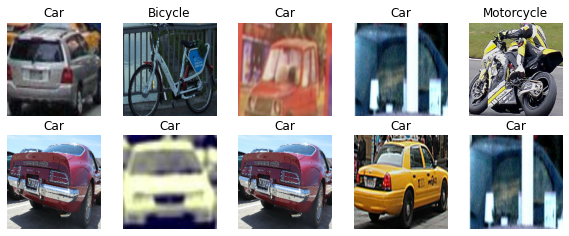

In [ ]:
# verify datasets
import random
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(10):
        ax = plt.subplot(5, 5, n + 1)
        rand = random.randint(1,50)
        plt.imshow(image_batch[rand] / 255.0)
        plt.title(classes.get(str(label_batch[rand])))
        plt.axis("off")
image_batch, label_batch = next(iter(train_dataset))
show_batch(image_batch,label_batch.numpy())

# Keras Sequential Model

In [ ]:
from tensorflow.keras import layers,Input
num_classes = 5

keras_model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
keras_model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

## Train the Model

In [ ]:
history_keras = keras_model.fit(
train_dataset,
  validation_data=valid_dataset,
  epochs=10
)

Epoch 1/10
90/90 [==============================] - 281s 1s/step - loss: 1.1534 - accuracy: 0.5458 - val_loss: 0.7626 - val_accuracy: 0.6944
Epoch 2/10
90/90 [==============================] - 8s 84ms/step - loss: 0.6787 - accuracy: 0.7393 - val_loss: 0.5927 - val_accuracy: 0.7717
Epoch 3/10
90/90 [==============================] - 8s 86ms/step - loss: 0.5857 - accuracy: 0.7776 - val_loss: 0.5256 - val_accuracy: 0.8009
Epoch 4/10
90/90 [==============================] - 8s 86ms/step - loss: 0.4962 - accuracy: 0.8118 - val_loss: 0.4310 - val_accuracy: 0.8478
Epoch 5/10
90/90 [==============================] - 8s 87ms/step - loss: 0.4235 - accuracy: 0.8412 - val_loss: 0.4383 - val_accuracy: 0.8197
Epoch 6/10
90/90 [==============================] - 8s 86ms/step - loss: 0.3531 - accuracy: 0.8711 - val_loss: 0.2479 - val_accuracy: 0.9204
Epoch 7/10
90/90 [==============================] - 8s 87ms/step - loss: 0.2384 - accuracy: 0.9156 - val_loss: 0.1848 - val_accuracy: 0.9438
Epoch 8/10
90

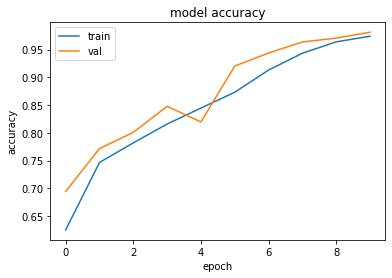

In [ ]:
plt.plot(history_keras.history['accuracy'])
plt.plot(history_keras.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

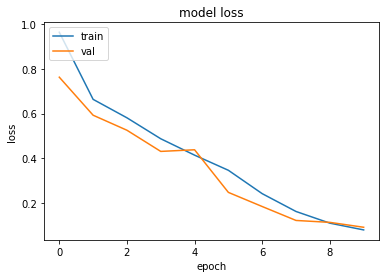

In [ ]:
plt.plot(history_keras.history['loss'])
plt.plot(history_keras.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluate the Model (test Dataset)

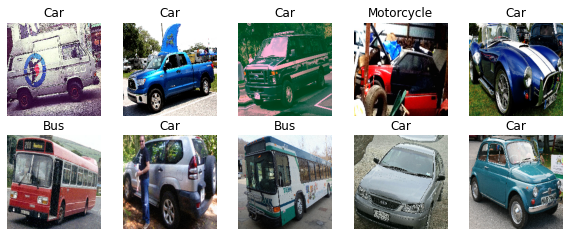

In [ ]:
test_dir = pathlib.Path(twd)
images = list(test_dir.glob('*.jpg'))
class_names=[0,1,2,3,4]
plt.figure(figsize=(10, 10))
c=0
for i in range(10):
   
    img = tf.keras.preprocessing.image.load_img(
        images[i], target_size=(180, 180)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = keras_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    img_class = class_names[np.argmax(score)]
    plt.title(classes.get(str(img_class)))
    plt.axis("off")

# Tensorflow Xception Model (Transfer Learning Base Model=Imagenet)

In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=20, decay_rate=0.96, staircase=True
)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "vehicles_model.h5", save_best_only=True
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

## Model Training 

In [ ]:
def make_model():
    base_model = tf.keras.applications.Xception(
        input_shape=(*IMAGE_SIZE, 3), include_top=False, weights="imagenet"
    )

    base_model.trainable = False

    inputs = tf.keras.layers.Input([*IMAGE_SIZE, 3])
    x = tf.keras.applications.xception.preprocess_input(inputs)
    x = base_model(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.7)(x)
    outputs = tf.keras.layers.Dense(5, activation="sigmoid")(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )

    return model

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
model = make_model()

In [ ]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=valid_dataset,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/10
90/90 [==============================] - 43s 420ms/step - loss: 0.6195 - accuracy: 0.7830 - val_loss: 0.1905 - val_accuracy: 0.9262
Epoch 2/10
90/90 [==============================] - 33s 367ms/step - loss: 0.2783 - accuracy: 0.9068 - val_loss: 0.1704 - val_accuracy: 0.9286
Epoch 3/10
90/90 [==============================] - 33s 369ms/step - loss: 0.2592 - accuracy: 0.9117 - val_loss: 0.1601 - val_accuracy: 0.9297
Epoch 4/10
90/90 [==============================] - 33s 369ms/step - loss: 0.2365 - accuracy: 0.9199 - val_loss: 0.1492 - val_accuracy: 0.9379
Epoch 5/10
90/90 [==============================] - 33s 368ms/step - loss: 0.2251 - accuracy: 0.9195 - val_loss: 0.1410 - val_accuracy: 0.9450
Epoch 6/10
90/90 [==============================] - 33s 368ms/step - loss: 0.2035 - accuracy: 0.9301 - val_loss: 0.1296 - val_accuracy: 0.9532
Epoch 7/10
90/90 [==============================] - 33s 369ms/step - loss: 0.2032 - accuracy: 0.9317 - val_loss: 0.1276 - val_accuracy: 0.9485

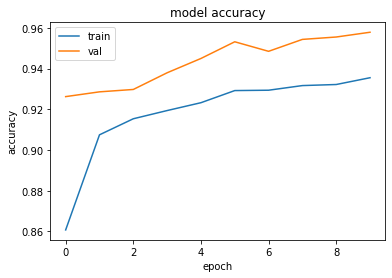

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


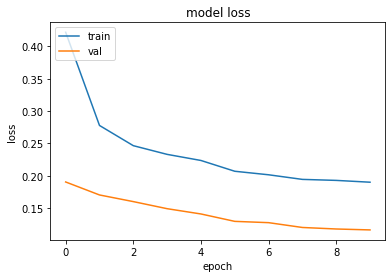

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model Evaluation

In [ ]:
# loading saved model
model = tf.keras.models.load_model('vehicles_model.h5')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 180, 180, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 180, 180, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 6, 6, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0     

In [ ]:
test_dir = pathlib.Path(twd)
images = list(test_dir.glob('*.jpg'))
print(images)

[PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000001.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000002.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000003.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000005.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000006.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000013.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000009.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000015.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000017.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000022.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000023.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000026.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000028.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000027.jpg'), PosixPath('/content/gdrive/MyDrive/Kaggle/testset/000032.jpg'), PosixPath('/content/gdrive/MyDrive/Kagg

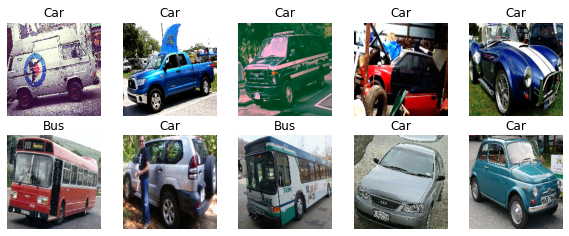

In [ ]:
test_dir = pathlib.Path(twd)
images = list(test_dir.glob('*.jpg'))
class_names=[0,1,2,3,4]
plt.figure(figsize=(10, 10))
for i in range(10):
   
    img = tf.keras.preprocessing.image.load_img(
        images[i], target_size=(180, 180)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    img_class = class_names[np.argmax(score)]
    plt.title(classes.get(str(img_class)))
    plt.axis("off")

### Motorcycle

This image most likely belongs to Motorcycle with a 31.69 percent confidence.


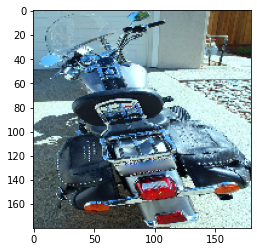

In [ ]:
img = tf.keras.preprocessing.image.load_img(
        '/content/gdrive/MyDrive/Kaggle/testset/000147.jpg', target_size=(180, 180)
    )
   
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
img_class = class_names[np.argmax(score)]
print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(classes.get(str(img_class)), 100 * np.max(score))
)
plt.imshow(img) 

### Taxi


This image most likely belongs to Taxi with a 32.22 percent confidence.


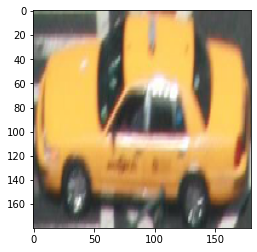

In [ ]:
img = tf.keras.preprocessing.image.load_img(
        '/content/gdrive/MyDrive/Kaggle/testset/000272.jpg', target_size=(180, 180)
    )
   
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
img_class = class_names[np.argmax(score)]
print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(classes.get(str(img_class)), 100 * np.max(score))
)
plt.imshow(img)

## Plots

# TF Lite Inference

In [ ]:

model.save('saved_models/my_model/', save_format='tf')


INFO:tensorflow:Assets written to: saved_models/my_model/assets


INFO:tensorflow:Assets written to: saved_models/my_model/assets


## Converting Model to TFLite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpu4s_bbyg/assets


In [ ]:
saved_model_dir = 'saved_models/my_model/'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

83686908

In [ ]:
!ls

converted_model.tflite	sample_data   test_tfrecords
gdrive			saved_model   train_tfrecords
model.tflite		saved_models  vehicles_model.h5


In [ ]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']

In [ ]:
input_shape

array([  1, 180, 180,   3], dtype=int32)

In [ ]:
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'serving_default_input_2:0',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 180, 180,   3], dtype=int32),
  'shape_signature': array([ -1, 180, 180,   3], dtype=int32),
  'sparsity_parameters': {}}]

## Model Inference

In [ ]:
from numpy import asarray
from PIL import Image
# load image
image_path =twd+'/000006.jpg'#'car'
image = Image.open(image_path).resize((180, 180))
image = np.array(image)
input=image[np.newaxis, ...]
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
input_data.shape

(1, 180, 180, 3)

In [ ]:
input_data = np.array(input, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
       .format(classes.get(str(class_names[np.argmax(output_data)])), 100 * np.max(output_data))
   )

This image most likely belongs to Car with a 100.00 percent confidence.


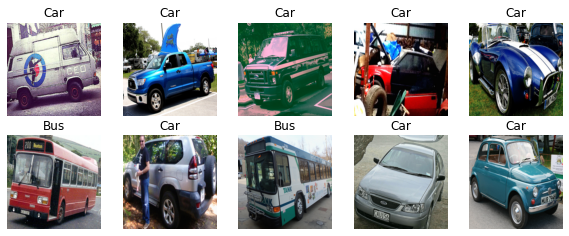

In [ ]:
# inference on test data
images = list(test_dir.glob('*.jpg'))
plt.figure(figsize=(10, 10))
for i in range(10):
  image = Image.open(images[i]).resize((180, 180))
  image = np.array(image)
  input=image[np.newaxis, ...]
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  input_data.shape
  input_data = np.array(input, dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()

  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
  output_data = interpreter.get_tensor(output_details[0]['index'])
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image)
  plt.title(classes.get(str(class_names[np.argmax(output_data)])))
  plt.axis("off")

   

(-0.5, 179.5, 179.5, -0.5)

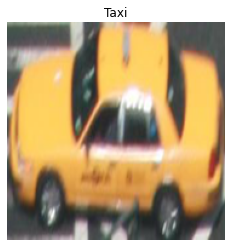

In [ ]:


image = Image.open('/content/gdrive/MyDrive/Kaggle/testset/000272.jpg').resize((180, 180))
image = np.array(image)
input=image[np.newaxis, ...]
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
input_data.shape
input_data = np.array(input, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
plt.imshow(image)
plt.title(classes.get(str(class_names[np.argmax(output_data)])))
plt.axis("off")

(-0.5, 179.5, 179.5, -0.5)

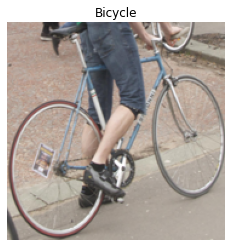

In [ ]:
image = Image.open('/content/gdrive/MyDrive/Kaggle/testset/000418.jpg').resize((180, 180))
image = np.array(image)
input=image[np.newaxis, ...]
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
input_data.shape
input_data = np.array(input, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
plt.imshow(image)
plt.title(classes.get(str(class_names[np.argmax(output_data)])))
plt.axis("off")